In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ezc3d import c3d

In [2]:
PATH_DATASETS = '../../Dataset/'
PATH_DATASET_1 = 'gait-dbase-1/'
PATH_DATASET_2 = 'gait-dbase-2/'

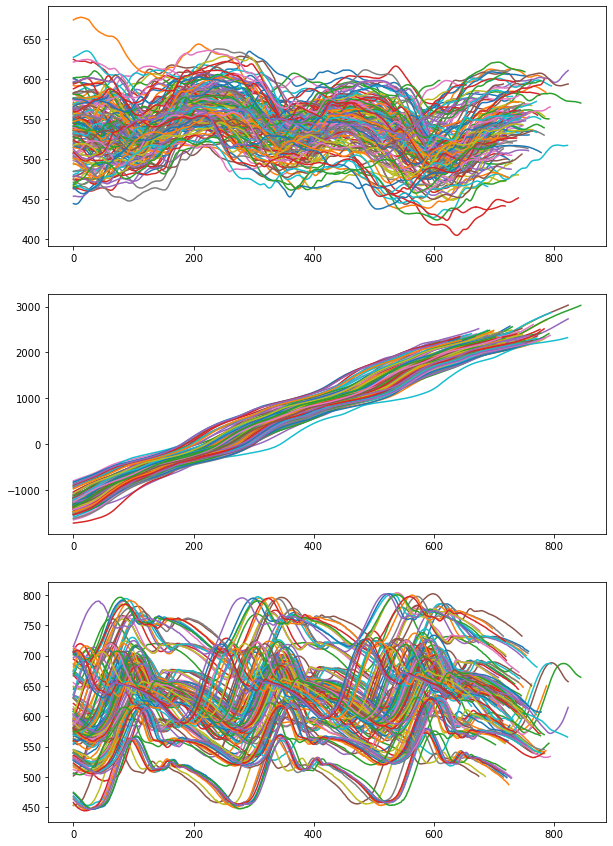

In [3]:
path = os.path.join(PATH_DATASETS, PATH_DATASET_2)
subjects = os.listdir(path)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

for subject in subjects:
    velocities_path = os.path.join(path, subject, 'Raw_Data')
    velocities = os.listdir(velocities_path)

    for velocity in velocities:
        if not 'V35' in velocity:
            continue

        files_path = os.path.join(velocities_path, velocity)
        files = os.listdir(files_path)

        for filename in files:
            content = c3d(os.path.join(files_path, filename), extract_forceplat_data=True)
            lfm1x = content['data']['points'][0, 6, :]
            lfm1y = content['data']['points'][1, 6, :]
            lfm1z = content['data']['points'][2, 6, :]

            ax1.plot(lfm1x)
            ax2.plot(lfm1y)
            ax3.plot(lfm1z)

plt.savefig('../../Figures/dbase2_lfm1.png')
plt.show() 

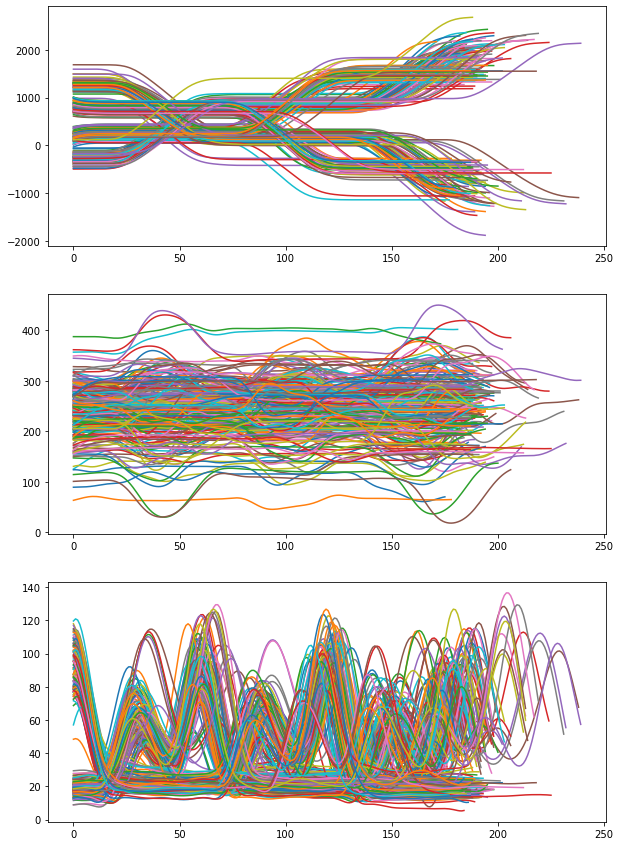

In [25]:
path = os.path.join(PATH_DATASETS, PATH_DATASET_1)
subjects = os.listdir(path)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

for subject in subjects:
    files_path = os.path.join(path, subject)
    files = os.listdir(files_path)
    for filename in files:
        if not 'C3' in filename:
            continue

        content = c3d(os.path.join(path, subject, filename), extract_forceplat_data=True)
        lfm1x = content['data']['points'][0, 12, :]
        lfm1y = content['data']['points'][1, 12, :]
        lfm1z = content['data']['points'][2, 12, :]

        ax1.plot(lfm1x)
        ax2.plot(lfm1y)
        ax3.plot(lfm1z)

plt.savefig('../../Figures/dbase1_lfm1.png')
plt.show()

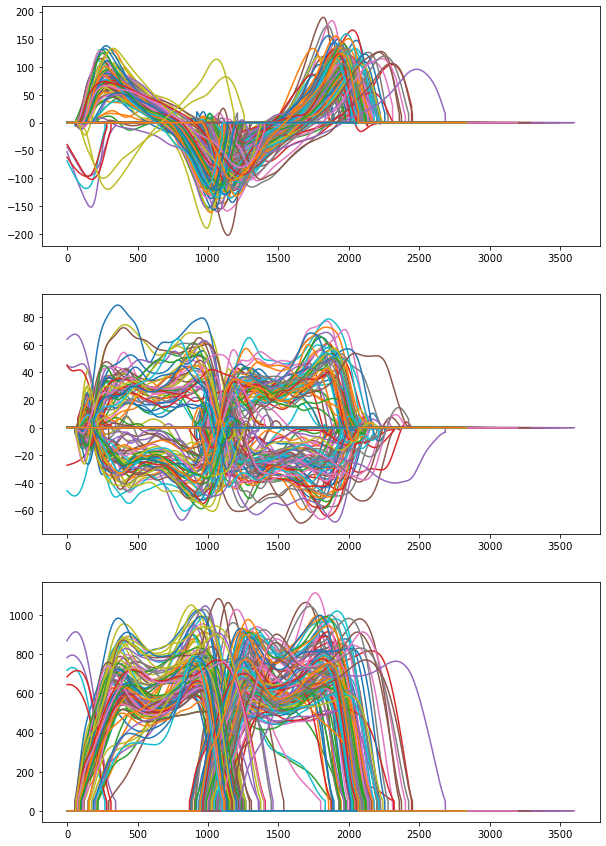

In [24]:
path = os.path.join(PATH_DATASETS, PATH_DATASET_1)
subjects = os.listdir(path)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

for subject in subjects:
    files_path = os.path.join(path, subject)
    files = os.listdir(files_path)
    for filename in files:
        if not 'C3' in filename:
            continue

        content = c3d(os.path.join(path, subject, filename), extract_forceplat_data=True)

        x = content['data']['platform'][1]['force'][0, :]
        y = content['data']['platform'][1]['force'][1, :]
        z = content['data']['platform'][1]['force'][2, :]

        ax1.plot(x)
        ax2.plot(y)
        ax3.plot(z)

plt.savefig('../../Figures/dbase1_grf2.png')
plt.show()

In [7]:
content['data']['platform'][0].keys()

dict_keys(['unit_force', 'unit_moment', 'unit_position', 'cal_matrix', 'corners', 'origin', 'force', 'moment', 'center_of_pressure', 'Tz'])

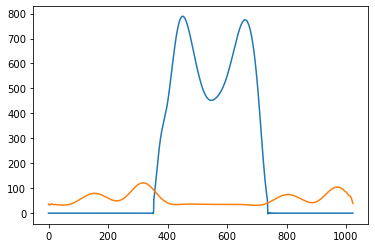

In [36]:
from scipy.signal import resample

N_SAMPLES = 1024

path = '/home/andromeda/Python/GRF-Synthesis-from-Motion-Trajectories/Dataset/gait-dbase-1/2014001/2014001_C4_05.c3d'

content = c3d(path, extract_forceplat_data=True)

z1 = content['data']['platform'][0]['force'][2, :]
z2 = content['data']['platform'][1]['force'][2, :]
lfccz = content['data']['points'][2, 13, :]
rfccz = content['data']['points'][2, 24, :]

z1 = resample(z1, N_SAMPLES, axis=0)
z2 = resample(z2, N_SAMPLES, axis=0)
lfccz = resample(lfccz, N_SAMPLES, axis=0)
rfccz = resample(rfccz, N_SAMPLES, axis=0)

plt.plot(z1)
# plt.plot(z2)
plt.plot(lfccz)
# plt.plot(rfccz)
plt.show()

In [19]:
z1.shape

(2985,)

In [ ]:
content['data']['platform'][0]['force'].shape

In [ ]:
z = content['data']['platform'][0]['force'][2, :]
plt.plot(z)

In [ ]:
z = content['data']['platform'][1]['force'][2, :]
plt.plot(z)

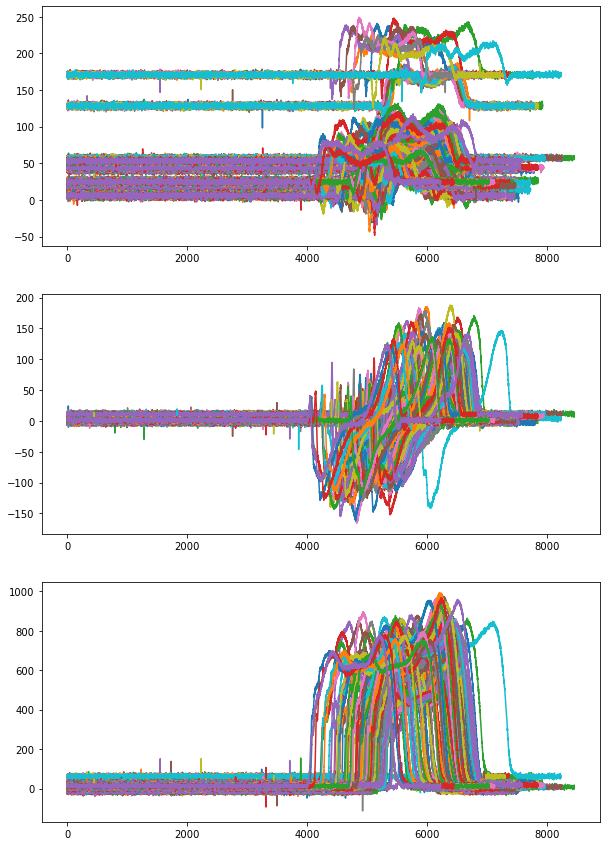

In [3]:
path = os.path.join(PATH_DATASETS, PATH_DATASET_2)
subjects = os.listdir(path)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

for subject in subjects:
    velocities_path = os.path.join(path, subject, 'Raw_Data')
    velocities = os.listdir(velocities_path)

    for velocity in velocities:
        if not 'V35' in velocity:
            continue

        files_path = os.path.join(velocities_path, velocity)
        files = os.listdir(files_path)

        for filename in files:
            content = c3d(os.path.join(files_path, filename), extract_forceplat_data=True)

            x = content['data']['platform'][4]['force'][0, :]
            y = content['data']['platform'][4]['force'][1, :]
            z = content['data']['platform'][4]['force'][2, :]

            ax1.plot(x)
            ax2.plot(y)
            ax3.plot(z)

plt.savefig('../../Figures/dbase2_grf1.png')
plt.show()

In [ ]:
z = content['data']['platform'][1]['force'][2, :]
plt.plot(z)